<a href="https://colab.research.google.com/github/BatoolMM/fastai/blob/master/Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The First Chapter**

In [ ]:
!pip install -Uqq fastbook
!pip install fastcore==1.0.9
!pip install utils
from utils import *
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.all import *
# !pip install ipywidgets
# import ipywidgets as widgets
# !jupyter nbextension enable --py widgetsnbextension
# !python3 -m pip install --upgrade pip
# !python3 -m pip install --upgrade Pillow

In [ ]:
data = untar_data(URLs.PETS)/'images'

In [ ]:
def is_cat(x):
    return x[0].isupper()

In [ ]:
data_str = ImageDataLoaders.from_name_func(data, 
                                           get_image_files(data),
                                           valid_pct = 0.2, 
                                           seed =42,
                                           label_func = is_cat,
                                           item_tfms = Resize(224))

In [ ]:
model = cnn_learner(data_str, resnet34, metrics=error_rate)
model.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.161170,0.025869,0.008119,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.057979,0.026976,0.008119,00:55


In [ ]:
image_uploader = widgets.FileUpload()
image_uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(image_uploader.data[0])

In [ ]:
is_cat, _,prob = model.predict(img)

In [ ]:
print(f"Is this a cat?: {is_cat}.")
print(f"Prob it's a cat: {prob[1].item():6f}")

Is this a cat?: True.
Prob it's a cat: 1.000000


# **The Second Chapter** 

In [ ]:
!pip install azure-cognitiveservices-search-imagesearch
import os
from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth

In [5]:
def search_images_bing(key, term, min_sz=128):
    client = api('https://api.cognitive.microsoft.com', auth(key))
    return L(client.images.search(query=term, count=150, min_height=min_sz, min_width=min_sz).value)
key = '8d86a0d22d7643549e560f18abfe8fde'
key2 ="d5851efce83544c6a29b96a7341f28dd"

In [ ]:
key = '8d86a0d22d7643549e560f18abfe8fde'
key2 ="d5851efce83544c6a29b96a7341f28dd"
Schefflera = search_images_bing(key, "Schefflera")
images_Schefflera = Schefflera.attrgot('content_url')


In [ ]:
len(images_Schefflera)

150

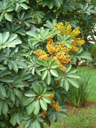

In [ ]:
dest = 'Schefflera.jpg'
download_url(images_Schefflera[0], dest)
img = Image.open(dest)
img.to_thumb(128.128)

In [6]:
plants_type = 'Dieffenbachia', 'Schefflera', 'Dracaena', 'Epipremnum aureum'
path = Path('plants')

In [7]:
if not path.exists():
    path.mkdir()
    for o in plants_type:
      dest = (path/o)
      dest.mkdir(exist_ok =True)
      results = search_images_bing(key, 'o')
      download_images(dest, urls = results.attrgot('content_url'))

In [25]:
files = get_image_files(path)
files

(#596) [Path('plants/Epipremnum aureum/00000050.jpg'),Path('plants/Epipremnum aureum/00000004.jpg'),Path('plants/Epipremnum aureum/00000025.jpg'),Path('plants/Epipremnum aureum/00000099.jpg'),Path('plants/Epipremnum aureum/00000017.jpg'),Path('plants/Epipremnum aureum/00000041.png'),Path('plants/Epipremnum aureum/00000146.svg'),Path('plants/Epipremnum aureum/00000139.png'),Path('plants/Epipremnum aureum/00000132.jpg'),Path('plants/Epipremnum aureum/00000100.png')...]

In [29]:
!ls plants

 Dieffenbachia	 Dracaena  'Epipremnum aureum'	 Schefflera


In [31]:
failed = verify_images(files)
failed


(#20) [Path('plants/Epipremnum aureum/00000146.svg'),Path('plants/Epipremnum aureum/00000106.svg'),Path('plants/Epipremnum aureum/00000037.svg'),Path('plants/Epipremnum aureum/00000103.svg'),Path('plants/Epipremnum aureum/00000133.png'),Path('plants/Schefflera/00000146.svg'),Path('plants/Schefflera/00000106.svg'),Path('plants/Schefflera/00000036.svg'),Path('plants/Schefflera/00000103.svg'),Path('plants/Schefflera/00000133.png')...]

In [32]:
failed.map(Path.unlink)

(#20) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
doc(DataBlock)

In [33]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [34]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = data.dataloaders(path)


In [37]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.452907,1.901845,0.800000,00:09


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,2.319875,1.959358,0.800000,00:09
1,2.280371,2.105587,0.878261,00:09
2,2.277832,2.378357,0.904348,00:10
3,2.227620,2.488199,0.895652,00:09
4,2.207014,2.569017,0.921739,00:09
5,2.191269,2.593658,0.913043,00:10
6,2.147978,2.627078,0.947826,00:09
7,2.101150,2.641416,0.947826,00:09
8,2.070926,2.622786,0.947826,00:09
9,2.056959,2.619283,0.930435,00:09


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


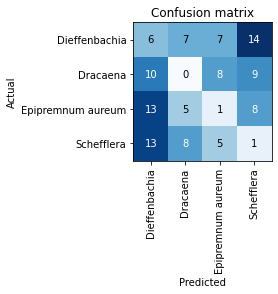

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
